In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.preprocessing import*
import datetime,time
from sklearn.metrics import*
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.options.display.float_format = '{:.7f}'.format

In [4]:
dfold = pd.read_csv('D:/project/homecredit/train_base_v1.csv')
dfold = pd.read_csv('D:/project/homecredit/train_all_v1.csv')


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 37)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 37)




data_dmatrix = lgb.Dataset(data=X_train,label=y_train)

params = {    'objective': 'binary',
    # 'is_unbalance': 'true',
    'device': 'gpu',
    'num_iteration': 100,
    'metric': 'auc',  
    'verbosity': 1,
    'reg_alpha':0.1,
    'reg_lambda': 0.1
    
    }


pipe_lgb = Pipeline([('scaler', StandardScaler()), ('lgb', lgb.LGBMClassifier(**params))])
# pipe_lgb = Pipeline([('scaler', StandardScaler()), ('lgb', lgb.LGBMClassifier())])
t0 = time.time()
pipe_lgb.fit(X_train.values, y_train.values,
            lgb__eval_set = [(X_train.values, y_train.values), (X_test.values, y_test.values)],
            lgb__eval_names = ['train', 'val'],
            lgb__eval_metric = 'auc',
            )
t1 = time.time()
y_pred = pipe_lgb.predict(X_test)
y_trainPred = pipe_lgb.predict(X_train)
print('LightGBM elapse time: {}'.format(t1-t0))

# # Fit the pipeline to the training data
# t0 = time.time()
# pipe_lgb.fit(X_train.values, y_train.values,lgb__eval_names = ['train', 'val'],)
# t1 = time.time()

# # Predict on the test set
# y_pred = pipe_lgb.predict(X_test)

# # Calculate AUC on the test set
# from sklearn.metrics import roc_auc_score
# auc = roc_auc_score(y_test, y_pred)
# print(f'Test AUC: {auc}')

# # Print execution time
# print("Execution time:", round(t1 - t0, 2), "seconds")

c:\Users\User\anaconda3\envs\Python39\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=100, num_iteration=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Number of positive: 2578, number of negative: 28173
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 65370
[LightGBM] [Info] Number of data points in the train set: 30751, number of used features: 440
[LightGBM] [Info] Using GPU Device: Quadro P600, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 185 dense feature groups (5.51 MB) transferred to GPU in 0.010332 secs. 1 sparse feature groups
[LightGBM] [Warning] num_iterations is set=100, num_iteration=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] num_iterations is set=100, num_iteration=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.083835 -> i

c:\Users\User\anaconda3\envs\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\User\anaconda3\envs\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


LightGBM elapse time: 6.817017555236816


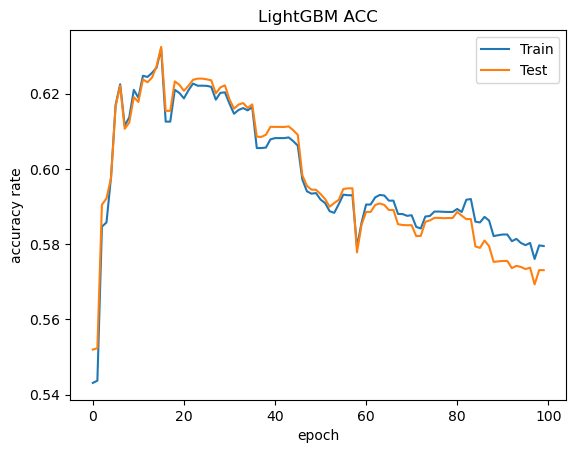

In [7]:
results = pipe_lgb.named_steps["lgb"].evals_result_
epochs = len(results['train']['auc'])
x_axis = range(0, epochs)
acc = [x for x in results['train']['auc']]
acc2 = [x for x in results['val']['auc']]
fig, ax = plt.subplots()
ax.plot(x_axis, acc, label='Train')
ax.plot(x_axis, acc2, label='Test')
ax.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy rate')
plt.title('LightGBM ACC')
plt.show()

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)


params = {
    'objective': 'binary',
    'is_unbalance': 'true',
    'device': 'gpu',
    'num_iteration': 100,
    'metric': 'auc',  
    'verbosity': 1
}


evals_result = {} 


start_time = time.time()
gbm = lgb.train(lgb_train, valid_sets=(lgb_valid, lgb_train), valid_names=('validate', 'train'))

y_pred = gbm.predict(X_test)


auc_val = evals_result['validate']['auc'] 
auc_train = evals_result['train']['auc']


end_time = time.time()
execution_time = end_time - start_time
print("\n程式執行花費的時間：", round(execution_time, 2), "秒")
print("Validation AUC:", auc_val)
print("Train AUC:", auc_train)
print("Validation ACC:", acc_val)
print("Train ACC:", acc_train)
print("完成時間:", datetime.datetime.now())

# 绘制记录的评估指标
lgb.plot_metric(evals_result, metric='auc')  
plt.show()

TypeError: train() missing 1 required positional argument: 'train_set'

In [ ]:
# start_time = time.time()

# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# X_val = np.array(X_val)
# y_val = np.array(y_val)

# end_time = time.time()  
# execution_time = end_time - start_time
# print("\n程式執行花費的時間：", round(execution_time,2), "秒")
# print("done時間:", datetime.datetime.now())  

In [ ]:
columns_with_na = train_all_v2.columns[train_all_v2.isna().any()].tolist()
columns_with_na

In [ ]:
start_time = time.time()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

end_time = time.time()  
execution_time = end_time - start_time
print("\n程式執行花費的時間：", round(execution_time,2), "秒")
print("done時間:", datetime.datetime.now()) 

In [ ]:
# pca = PCA(n_components=0.95)  # 選擇解釋變異量為95%的主成分
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
# X_val_pca = pca.transform(X_val_scaled)

# # 打印保留的主成分數量
# print("保留的主成分數量:", pca.n_components_)

In [ ]:
params = {
    'objective': 'binary',
    'is_unbalance': 'true',
    'device': 'gpu',
    'num_iteration': 100,
    'metric': 'auc',  
    'verbosity': 1
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


evals_result = {} 


start_time = time.time()
gbm = lgb.train(params, lgb_train, valid_sets=(lgb_eval, lgb_train), valid_names=('validate', 'train'))

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)


auc_val = evals_result['validate']['auc'] 
auc_train = evals_result['train']['auc']


end_time = time.time()
execution_time = end_time - start_time
print("\n程式執行花費的時間：", round(execution_time, 2), "秒")
print("Validation AUC:", auc_val)
print("Train AUC:", auc_train)
print("Validation ACC:", acc_val)
print("Train ACC:", acc_train)
print("完成時間:", datetime.datetime.now())

# 绘制记录的评估指标
lgb.plot_metric(evals_result, metric='auc')  
plt.show()


In [ ]:
duplicates = train_all_v2.columns[train_all_v2.columns.duplicated()]
print(duplicates)

In [ ]:
columns_with_duplicates = train_all_v2.columns[train_all_v2.columns.duplicated()]

if columns_with_duplicates.empty:
    print("Frame中的列没有重复。")
else:
    print("以下列是重复的：", columns_with_duplicates.tolist())

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 計算AUC曲線上的點
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

# 繪製AUC曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0]) # 實際沒違約，預測正確
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0]) # 實際違約，預測卻沒有

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))